In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

#### Create Data

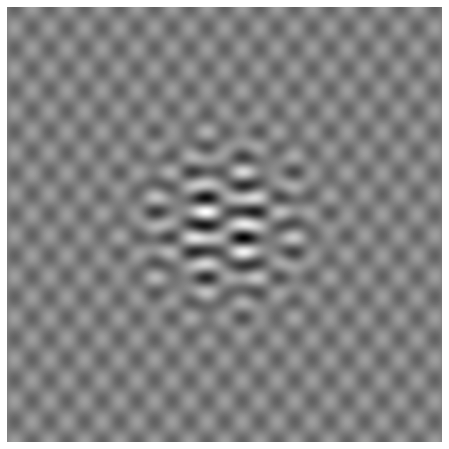

In [2]:
t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

### Corruption with white noise

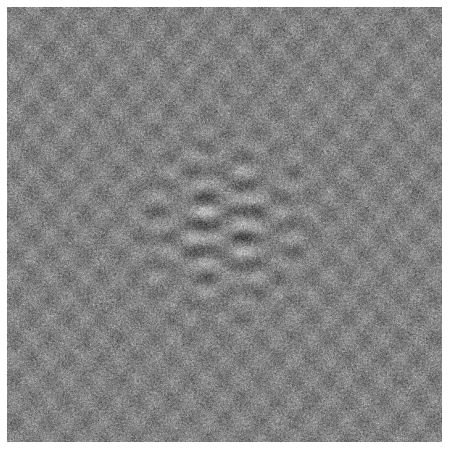

In [4]:
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

### Computing SVD and trucating with  Gavish_Donoho Criteria

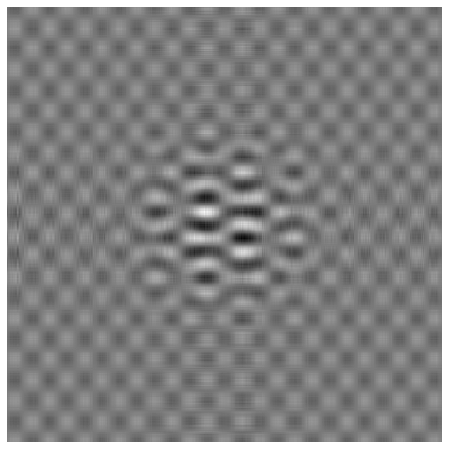

In [5]:
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff 

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]
plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

In [6]:
### Trucating with  90% energy criteria (Common, but wrong practice)

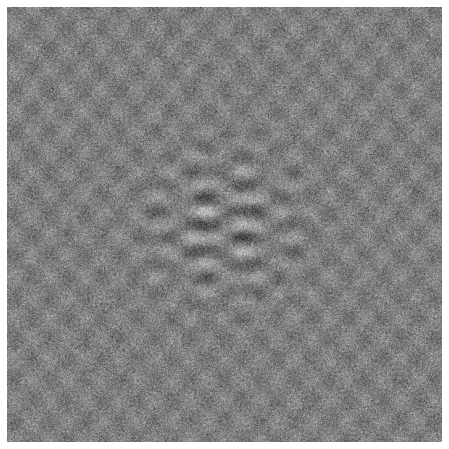

In [7]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

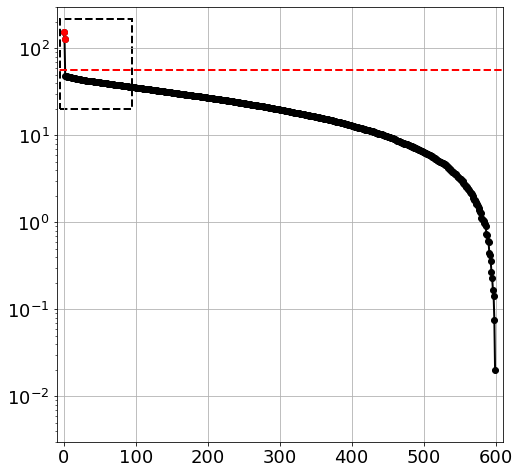

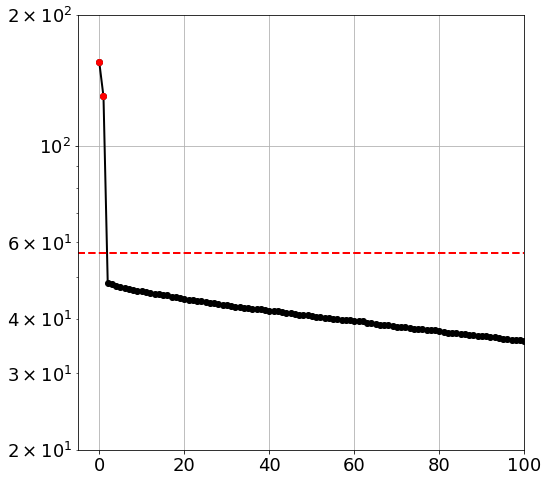

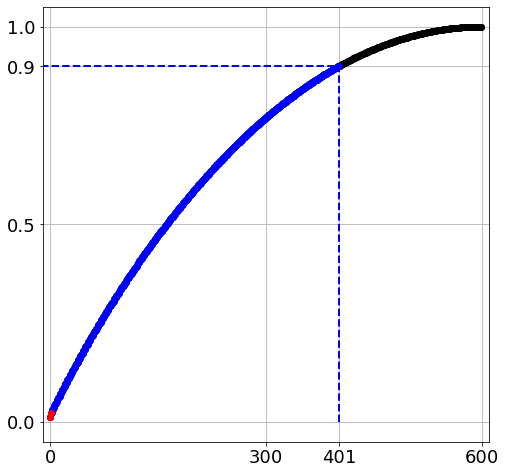

In [8]:
## Plot Singular Values

fig1,ax1 = plt.subplots(1)

ax1.semilogy(S,'-o', color='k', LineWidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
rect = patches.Rectangle((-5,20),100,200,LineWidth=2,LineStyle='--',FaceColor='none',EdgeColor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()

fig2,ax2 = plt.subplots(1)

ax2.semilogy(S,'-o', color='k', LineWidth=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', LineWidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', LineWidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',LineWidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',LineWidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',LineWidth=2)

ax3.grid()
plt.show()



Bibliography <br> [
Steve Brunton, University of Washingon](https://www.youtube.com/watch?v=epoHE2rex0g&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=36)